In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy


#model.sigma, model.mu, model.lamb, model.beta, model.phi, model.psi, model.chi
# 0.51146787, 0.09446296, 0.49276760, 0.74628520, 0.87910885, 0.42740121, 0.86071467

observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI52.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)

f2, csdy = csd(observed_bold, observed_bold, fs=0.5, noverlap=None,  window='hamming', scaling='density', nfft=4096, nperseg=200, return_onesided=True)
observed_sum = torch.sum(csdy)
csdy = csdy / observed_sum

_, final_y = getEulerBOLD(sigma=0.5, mu=0.4, lamb=0.2, beta=10, phi=0.87910885, psi=0.42740121, chi=0.86071467, noise=True, length=1000)
final_y = torch.stack(final_y)
f, csdx = csd(final_y.detach().numpy(), final_y.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
final_sum = torch.sum(csdx)
csdx = csdx / final_sum
print(observed_sum, final_sum)

plt.plot(np.arange(len(observed_bold)), observed_bold, label="observed")
plt.show()
plt.plot(np.arange(len(final_y)), final_y.detach().numpy(), label="simulated")
plt.legend()
plt.show()


plt.plot(f2, torch.sqrt(csdy.real ** 2 + csdy.imag ** 2).detach().numpy(), label='ground truth CSD')
print(torch.sqrt(csdy.real ** 2 + csdy.imag ** 2).detach().numpy())
plt.xlim(0, 0.1)
plt.show()
plt.xlim(0, 0.5)
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy
_, final_y = getEulerBOLD(sigma=0.1, mu=0.1, lamb=0.1, beta=1, phi=20, psi=20, chi=20, noise=True, length=1000)
final_y = torch.stack(final_y)
plt.plot(np.arange(len(final_y)), final_y.detach().numpy(), label="simulated")
plt.legend()
plt.show()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


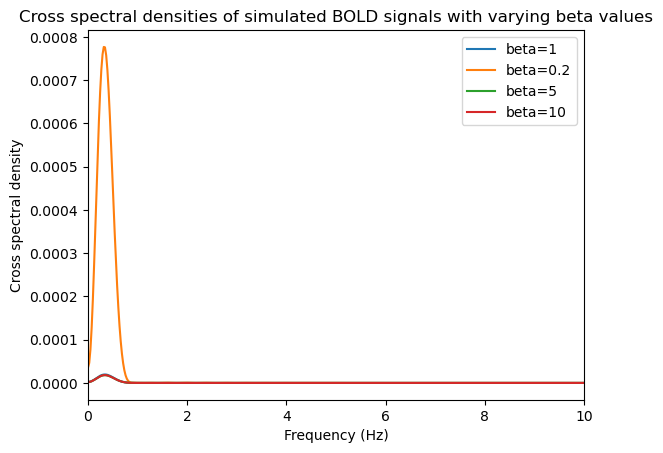

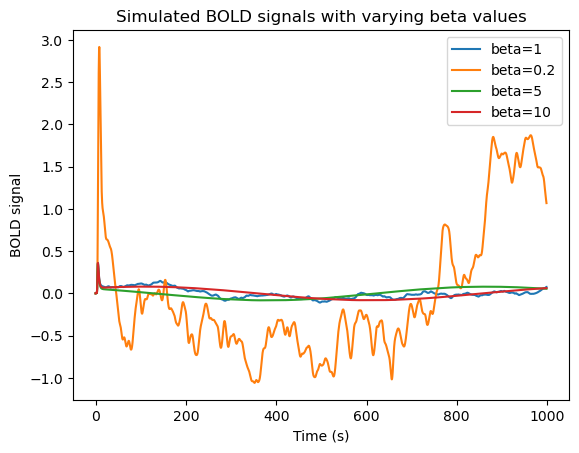

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy

t0, final_y_0 = getEulerBOLD(sigma=2, mu=2, lamb=2, beta=1, phi=2, psi=2, chi=2, noise=True, length=1000)
final_y_0 = torch.stack(final_y_0)
f, csdx = csd(final_y_0.detach().numpy(), final_y_0.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx), label="beta=1")


t1, final_y_1 = getEulerBOLD(sigma=0.4, mu=1.0, lamb=0.4, beta=1.0, phi=0.4, psi=0.4, chi=0.4, noise=True, length=1000)
final_y_1 = torch.stack(final_y_1)
f, csdx1 = csd(final_y_1.detach().numpy(), final_y_1.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx1), label="beta=0.2")

t2, final_y_2 = getEulerBOLD(sigma=2, mu=2, lamb=2, beta=5, phi=2, psi=2, chi=2, noise=True, length=1000)
final_y_2 = torch.stack(final_y_2)
f, csdx2 = csd(final_y_2.detach().numpy(), final_y_2.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx2), label="beta=5")


t3, final_y_3 = getEulerBOLD(sigma=2, mu=2, lamb=2, beta=10, phi=2, psi=2, chi=2, noise=True, length=1000)
final_y_3 = torch.stack(final_y_3)
f, csdx3 = csd(final_y_3.detach().numpy(), final_y_3.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx3), label="beta=10")

plt.xlim(0, 10)

plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral density")
plt.title("Cross spectral densities of simulated BOLD signals with varying beta values")

plt.show()

plt.plot(t0.detach().numpy(), final_y_0.detach().numpy(), label="beta=1")
plt.plot(t1.detach().numpy(), final_y_1.detach().numpy(), label="beta=0.2")
plt.plot(t2.detach().numpy(), final_y_2.detach().numpy(), label="beta=5")
plt.plot(t3.detach().numpy(), final_y_3.detach().numpy(), label="beta=10")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("BOLD signal")
plt.title("Simulated BOLD signals with varying beta values")
plt.show()

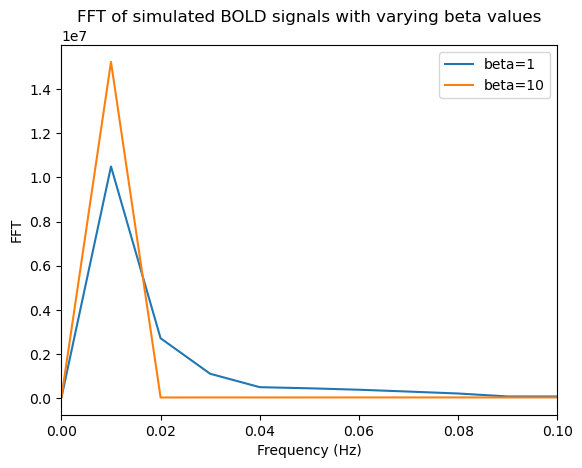

In [3]:
sig1 = final_y_0.detach().numpy()
sig3 = final_y_3.detach().numpy()
csd2 = scipy.fft.fft(sig1)
csd3 = scipy.fft.fft(sig3)

f = scipy.fft.fftfreq(len(sig1), d=0.001)

plt.plot(scipy.fft.fftshift(f), scipy.fft.fftshift(csd2.real ** 2 + csd2.imag ** 2), label="beta=1")
plt.plot(scipy.fft.fftshift(f), scipy.fft.fftshift(csd3.real ** 2 + csd3.imag ** 2), label="beta=10")

plt.xlim(0, 0.1)

plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT")
plt.title("FFT of simulated BOLD signals with varying beta values")

plt.show()

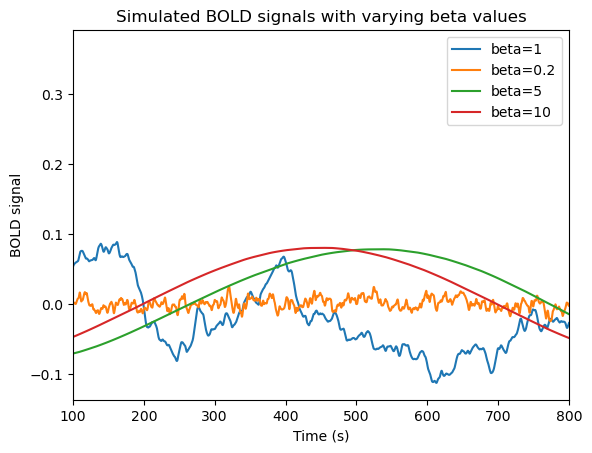

In [4]:
plt.plot(t0.detach().numpy(), final_y_0.detach().numpy(), label="beta=1")
plt.plot(t1.detach().numpy(), final_y_1.detach().numpy(), label="beta=0.2")
plt.plot(t2.detach().numpy(), final_y_2.detach().numpy(), label="beta=5")
plt.plot(t3.detach().numpy(), final_y_3.detach().numpy(), label="beta=10")

plt.xlim(100, 800)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("BOLD signal")
plt.title("Simulated BOLD signals with varying beta values")
plt.show()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


/rds/general/user/ak1920/home/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/rds/general/user/ak1920/home/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


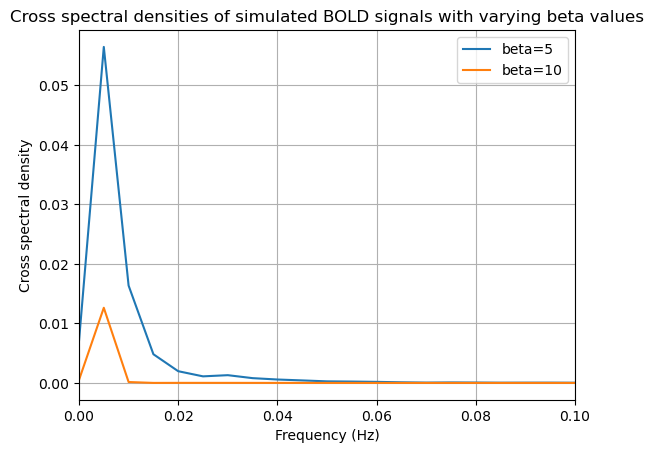

In [5]:
fs = 1000  # Sampling frequency
t = np.arange(0, 10, 1/fs)  # 10 seconds of data

# Generate a signal with a peak at 0.1 Hz
signal_3 = np.sin(2 * np.pi * 0.1 * t)  # 0.1 Hz sine wave
signal_3 += np.random.normal(0, 0.5, len(t))  # Add some random noise

observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI52.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)

f, csdx2 = csd(observed_bold, observed_bold, fs=0.5, noverlap=None,  window='hamming', scaling='density', nfft=217, nperseg = 217, return_onesided=True)
csdx2 = csdx2 / (torch.sum(csdx2) ** 2 / 4)
# plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx2), label="observed")

# f, csdx2 = csd(final_y_0, final_y_0, fs=100, noverlap=None,  window='hann', scaling='density', nfft=4096, nperseg = 256)
f, csdx2 = csd(final_y_0[10000:], final_y_0[10000:], fs=100, nperseg = 20000)
plt.plot(torch.fft.fftshift(f).detach().numpy(), torch.fft.fftshift(csdx2).detach().numpy(), label="beta=5")

# f, csdx3 = csd(final_y_3, final_y_3, fs=100, noverlap=None,  window='hann', scaling='density', nfft=4096, nperseg = 256)
f, csdx3 = csd(final_y_3[10000:], final_y_3[10000:], fs=100, nperseg = 20000)
plt.plot(torch.fft.fftshift(f).detach().numpy(), torch.fft.fftshift(csdx3).detach().numpy(), label="beta=10")



plt.xlim(0, 0.1)

plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral density")
plt.title("Cross spectral densities of simulated BOLD signals with varying beta values")
plt.grid()
plt.show()

In [6]:
print(csdx2)

tensor([0.0070+0.j, 0.0565+0.j, 0.0164+0.j,  ..., 0.0048+0.j, 0.0164+0.j, 0.0565+0.j],
       grad_fn=<MeanBackward1>)


In [7]:
positive_mask = f >= 0

# Apply the mask to filter out negative frequencies in both tensors
positive_frequencies = f[positive_mask]
csdx2r = csdx2[positive_mask]
torch.set_printoptions(precision=20)
print(f[torch.argmax(csdx.real)])
print(f[torch.argmax(csdx1.real)])
print(f[torch.argmax(csdx2r.real)])
print(f[torch.argmax(csdx4.real)])


tensor(20.40999984741210937500)
tensor(20.40999984741210937500)
tensor(0.00499999988824129105)


NameError: name 'csdx4' is not defined

In [ ]:
for x in csdx:
    print(x)

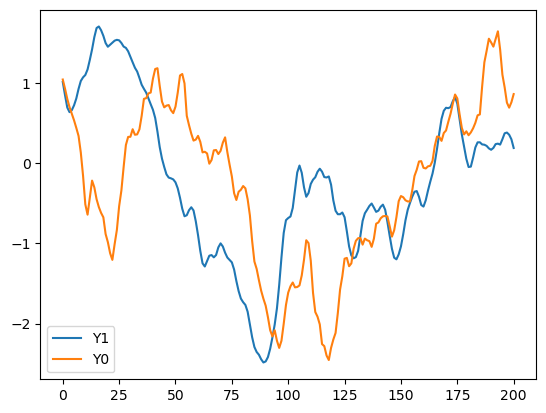

In [53]:
y1 = final_y_1[10000:]
y0 = final_y_0[10000:]
y2 = final_y_2[10000:]
y1 = y1/y1.std()
y0 = y0/y0.std()
y2 = y2/y2.std()
yd = y0
plt.plot(y1.detach()[::200][-217:], label='Y1')
plt.plot(y0.detach()[::200][-217:], label='Y0')
plt.legend()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
tensor([0.0000, 0.0025, 0.0050, 0.0075, 0.0100, 0.0125, 0.0150, 0.0175, 0.0200,
        0.0225, 0.0250, 0.0275, 0.0300, 0.0325, 0.0350, 0.0375, 0.0400, 0.0425,
        0.0450, 0.0475])


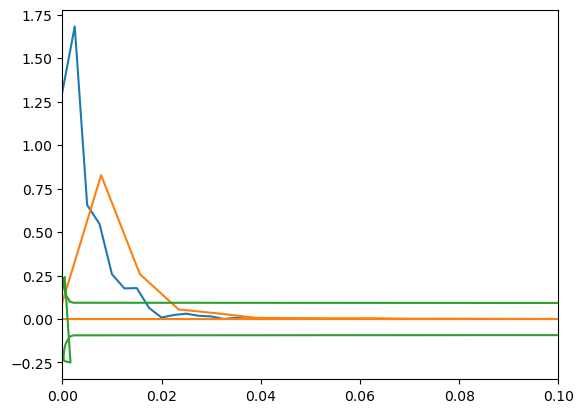

In [59]:
f, csd1 = csd(y1, y1, fs=100, nperseg=40000)
f = torch.fft.fftshift(f)[20000:20020]
csd1 = torch.fft.fftshift(csd1)[20000:20020]
plt.xlim(0, 0.1)
plt.plot(f.detach(), csd1.detach()/50)
plt.plot(f2.detach(), csd2.detach()/20)
plt.plot(po.detach(), fo.detach())
print(f)

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter

# Design a low-pass filter
fs = 100  # Define your sampling frequency here
nyq = 0.5 * fs
cutoff = 0.25  # cutoff frequency in Hz
order = 5
b, a = butter(order, cutoff / nyq, btype='low')

# Convert filter coefficients to PyTorch tensors
b = torch.tensor(b, dtype=torch.float32)
a = torch.tensor(a, dtype=torch.float32)

# Apply the filter using custom filtering function to keep gradients
def apply_filter(y, b, a):
    y_filtered = F.conv1d(y.view(1, 1, -1), b.view(1, 1, -1), padding=len(b) - 1)  # Convolution with padding
    y_filtered = y_filtered.view(-1)  # Flatten the result
    return y_filtered

# Apply the filter (note: this is a simplified approximation of filtfilt, true filtfilt would require forward and backward filtering)
filtered_signal_0 = apply_filter(y0, b, a)
filtered_signal_1 = apply_filter(y1, b, a)

# Downsample by a factor of 200 using custom downsampling function to keep gradients
def downsample(y, factor):
    return y[::factor]

# Downsample the filtered signals
downsampled_signal_0 = downsample(filtered_signal_0, 200)
downsampled_signal_1 = downsample(filtered_signal_1, 200)

# New sampling rate
new_fs = fs / 200

print("Downsampled signal length:", len(downsampled_signal_0))
print("Original sampling rate:", fs)
print("New sampling rate:", new_fs)

# Plotting
plt.plot(downsampled_signal_0.detach().numpy(), label='downsampled y0')
plt.plot(downsampled_signal_1.detach().numpy(), label='downsampled y1')
plt.legend()
plt.show()

In [20]:
observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI5.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()

In [82]:
f1,p1 = csd(y1[::200][-217:], y1[::200][-217:], fs=0.5, nperseg=64)
f0,p0 = csd(y0[::200][-217:], y0[::200][-217:], fs=0.5, nperseg=64)
# f2,p2 = csd(downsampled_signal_0, downsampled_signal_0, fs=0.5, nperseg=64)
# f3,p3 = csd(downsampled_signal_1, downsampled_signal_1, fs=0.5, nperseg=64)
fo, po = csd(observed_bold, observed_bold, fs=0.5, nperseg = 32)
f, csd1 = csd(y1, y1, fs=100, nperseg=50000)
f = torch.fft.fftshift(f)[25000:25100]
csd1 = torch.fft.fftshift(csd1)[25000:25100]




Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
nperseg = 50000 is greater than input length  = 40011, using nperseg = 40011
Input data is complex, switching to return_onesided=False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


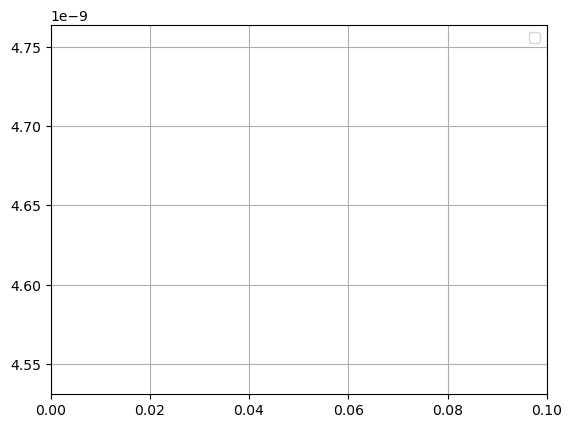

In [83]:
# plt.plot(f1.detach(),p1.detach(), label='beta=0.2')
# plt.plot(f0.detach(),p0.detach(), label='beta=1')
# plt.plot(fo.detach(),po.detach(), label='observed')
plt.plot(f.detach(), csd1.detach())
plt.legend()
plt.xlim(0, 0.1)
plt.grid()

In [ ]:
plt.plot(f3.detach(),p1[::200].detach(), label='beta=0.2 downsampled')
plt.plot(f2.detach(),p0[::200].detach(), label='beta=1 downsampled')
plt.plot(fo.detach(),po.detach(), label='observed')
plt.legend()
plt.xlim(0, 0.1)
plt.grid()

In [35]:
p1.shape

torch.Size([25000])

In [38]:
po.shape

torch.Size([64])

In [8]:
observed_bold.shape

torch.Size([217])

In [9]:
final_y_0.shape

torch.Size([100010])

In [34]:
y0.shape

torch.Size([90010])

In [48]:
f1

tensor([ 0.00000000000000000000,  0.00999999977648258209,
         0.01999999955296516418,  ...,
        -0.02999999932944774628, -0.01999999955296516418,
        -0.00999999977648258209])

In [47]:
f1[::100]

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49., -50., -49., -48., -47., -46., -45., -44., -43., -42., -41.,
        -40., -39., -38., -37., -36., -35., -34., -33., -32., -31., -30., -29.,
        -28., -27., -26., -25., -24., -23., -22., -21., -20., -19., -18., -17.,
        -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
         -4.,  -3.,  -2.,  -1.])